In [46]:
from pydub import AudioSegment
import os
import speech_recognition as sr

def transcribe_audio(audio):
    recognizer = sr.Recognizer()
    
    temp_wav_file = "temp_audio.wav"
    audio.export(temp_wav_file, format="wav")
    
    with sr.AudioFile(temp_wav_file) as source:
        audio_data = recognizer.record(source)
        try:
            text = recognizer.recognize_google(audio_data)
            return text.lower()
        except sr.UnknownValueError:
            return ""
        except sr.RequestError:
            print("Could not request results from Google Web Speech API; check your internet connection")
            return ""
    os.remove(temp_wav_file)  

def sound_background_record(input_folder, output_folder):
    os.makedirs(output_folder, exist_ok=True)
    
    for filename in os.listdir(input_folder):
        if filename.endswith(".mp3") or filename.endswith(".wav"):
            file_path = os.path.join(input_folder, filename)
            audio = AudioSegment.from_file(file_path)
            
            audio_text = transcribe_audio(audio)
            word_to_find = "jarvis"
            
            word_start_times = []
            index = audio_text.find(word_to_find)
            while index != -1:
                word_start_times.append(index * 1000)  
                index = audio_text.find(word_to_find, index + 1)
            
            for start_time in word_start_times:
                start_ms = max(0, start_time - 1000)
                end_ms = start_time + 1000
                word_clip = audio[start_ms:end_ms]
                
                output_filename = f"{os.path.splitext(filename)[0]}_{start_time}.wav"
                output_path = os.path.join(output_folder, output_filename)
                
                word_clip.export(output_path, format="wav")
                
                print(f"Saved {output_filename} successfully.")

def word_wake_record(input_folder, output_folder):
    os.makedirs(output_folder, exist_ok=True)
    
    for filename in os.listdir(input_folder):
        if filename.endswith(".mp3") or filename.endswith(".wav"):
            file_path = os.path.join(input_folder, filename)
            audio = AudioSegment.from_file(file_path)
            
            audio_text = transcribe_audio(audio)
            word_to_find = "jarvis"
            
            word_start_times = []
            index = audio_text.find(word_to_find)
            while index != -1:
                word_start_times.append(index * 1000) 
                index = audio_text.find(word_to_find, index + 1)
            
            prev_end = 0
            for start_time in word_start_times:
                end_ms = max(0, start_time - 1000)
                background_clip = audio[prev_end:end_ms]
                
                if len(background_clip) >= 2000:
                    output_filename = f"{os.path.splitext(filename)[0]}_{prev_end}.wav"
                    output_path = os.path.join(output_folder, output_filename)
                    
                    background_clip.export(output_path, format="wav")
                    
                    print(f"Saved {output_filename} successfully.")
                
                prev_end = start_time + 1000
            
            if prev_end < len(audio):
                background_clip = audio[prev_end:]
                
                if len(background_clip) >= 2000:
                    output_filename = f"{os.path.splitext(filename)[0]}_{prev_end}.wav"
                    output_path = os.path.join(output_folder, output_filename)
                    
                    background_clip.export(output_path, format="wav")
                    
                    print(f"Saved {output_filename} successfully.")




input_folder = 'jarvis'
output_folder1 = 'word_background'
output_folder2 = 'jarvis_words'
word_wake_record(input_folder, output_folder2)
sound_background_record(input_folder, output_folder1)



Saved 00a97647-55b9-4f62-be20-8e4b0ee510b0_1000.wav successfully.
Saved 00aba123-ae3a-4e0a-8603-9f7277b7d41f_1000.wav successfully.
Saved 00af045b-ead8-4379-9110-c038e0bdd855_1000.wav successfully.
Saved 00c476c2-9e01-40df-96c8-a5153db5b157_1000.wav successfully.
Saved 016f5c2e-907b-4711-8a3b-49b73a0655c2_1000.wav successfully.
Saved 01f13214-d1eb-48b6-8f58-e397731158fd_1000.wav successfully.
Saved 01f46f97-7ea8-474a-9285-13b038477eec_1000.wav successfully.
Saved 03cbb7ba-8e69-4f6a-b289-32ed4b686417_1000.wav successfully.
Saved 03efb4a6-2f04-4433-892a-f4d1a42f33bd_1000.wav successfully.
Saved 0b601785-a157-4263-920c-7890e3564efc_1000.wav successfully.
Saved 0c20da21-b168-470d-9b99-98e2161ed91a_1000.wav successfully.
Saved 0c7910b3-4414-4d48-9e6f-292a1d099f6f_1000.wav successfully.
Saved 0df7b7ff-d667-488d-b4c2-ea78b4b847fe_1000.wav successfully.
Saved 0e165e17-134f-4cee-9ec6-b43d1412d7d7_1000.wav successfully.
Saved 0eaa1c84-950f-44d1-88f1-f000c3e6e4ba_1000.wav successfully.
Saved 0eb1

# data augmentation 

In [21]:
import os
import soundfile as sf
from audiomentations import Compose, TimeStretch, PitchShift, Shift
import numpy as np

def load_audio(file_path):
    audio, sample_rate = sf.read(file_path)
    if audio.ndim > 1:
        audio = audio.mean(axis=1)  
    return audio, sample_rate

def save_audio(file_path, audio, sample_rate):
    sf.write(file_path, audio, sample_rate)

augmentations = Compose([
    TimeStretch(min_rate=0.8, max_rate=1.25, p=1.0),
    PitchShift(min_semitones=-4, max_semitones=4, p=1.0),
    Shift(min_shift=-0.5, max_shift=0.5, p=1.0)
])

input_folder = 'jarvis_words'
output_folder = 'jarvis_words_augmented'

os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    if filename.endswith('.wav'): 
        input_path = os.path.join(input_folder, filename)
        audio, sample_rate = load_audio(input_path)

        save_audio(os.path.join(output_folder, filename), audio, sample_rate)

        for i, aug in enumerate([augmentations.transforms[0], augmentations.transforms[1], augmentations.transforms[2]]):
            augmented_audio = aug(samples=audio, sample_rate=sample_rate)
            augmented_filename = f"{os.path.splitext(filename)[0]}_aug_{i+1}.wav"
            save_audio(os.path.join(output_folder, augmented_filename), augmented_audio, sample_rate)

print("Audio augmentation completed.")

C:\Users\Entezar\AppData\Roaming\Python\Python39\site-packages\audiomentations\core\transforms_interface.py:62: UserWarning: Warning: input samples dtype is np.float64. Converting to np.float32
  warnings.warn(


Audio augmentation completed.


In [44]:
import os
import librosa
import soundfile as sf
import numpy as np

def augment_audio(file_path, output_folder, sr=22050):
    y, sr = librosa.load(file_path, sr=sr)
    
    target_length = 2 * sr
    if len(y) > target_length:
        y = y[:target_length]
    else:
        y = np.pad(y, (0, max(0, target_length - len(y))), "constant")

    original_filename = os.path.basename(file_path)
    sf.write(os.path.join(output_folder, f"original_{original_filename}"), y, sr)

    y_stretched = librosa.effects.time_stretch(y, rate=0.9) 
    if len(y_stretched) > target_length:
        y_stretched = y_stretched[:target_length]
    else:
        y_stretched = np.pad(y_stretched, (0, max(0, target_length - len(y_stretched))), "constant")
    sf.write(os.path.join(output_folder, f"time_stretched_{original_filename}"), y_stretched, sr)

    y_shifted = librosa.effects.pitch_shift(y, sr=sr, n_steps=2)
    sf.write(os.path.join(output_folder, f"pitch_shifted_{original_filename}"), y_shifted, sr)

def process_folder(input_folder, output_folder, sr=22050):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        if filename.endswith(".wav"):
            file_path = os.path.join(input_folder, filename)
            augment_audio(file_path, output_folder, sr)
            
input_folder = 'word_background'
output_folder = "word_background_augmented"

process_folder(input_folder, output_folder)


# make labels array

In [3]:
import os

total_files = 510
label1_range = range(1, 256)
label2_range = range(256, 511)

y_array = []

for i in range(1, total_files + 1):
    if i in label1_range:
        y_array.append(1)
    elif i in label2_range:
        y_array.append(0)

print(len(y_array))

510


In [42]:
import os
import numpy as np
import librosa
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=45000)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=30)
    mfccs_mean = np.mean(mfccs.T, axis=0)
    return mfccs_mean

folder_path = 'jarvis_background'
labels = y_array  

data = []
for i, file in enumerate(os.listdir(folder_path)):
    if file.endswith('.wav'): 
        file_path = os.path.join(folder_path, file)
        features = extract_features(file_path)
        class_label = labels[i]
        data.append([features, class_label])

df = pd.DataFrame(data, columns=['features', 'class_label'])

X = np.array(df['features'].tolist())
y = np.array(df['class_label'].tolist())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

model.save('audio_classification_model.h5')


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 128)               3968      
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_45 (Dense)            (None, 64)                8256      
                                                                 
 dropout_19 (Dropout)        (None, 64)                0         
                                                                 
 dense_46 (Dense)            (None, 32)                2080      
                                                                 
 dropout_20 (Dropout)        (None, 32)                0         
                                                                 
 dense_47 (Dense)            (None, 1)                

# plot accuracy and loss

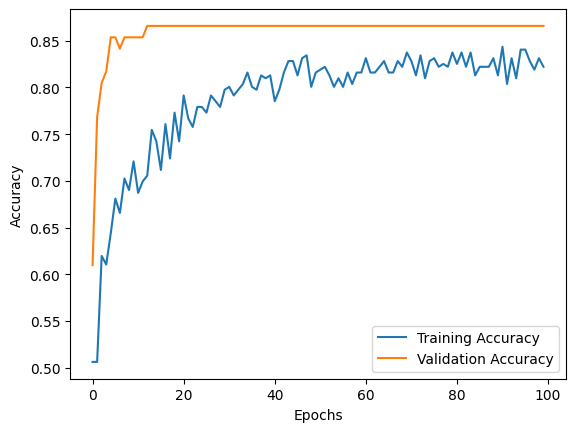

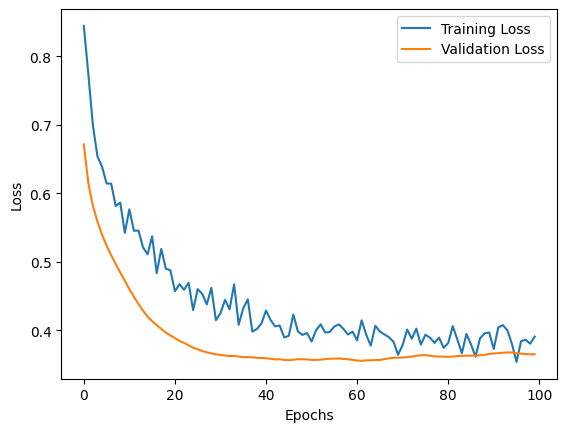

In [46]:
import matplotlib.pyplot as plt

# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


4/4 [==============================] - 0s 5ms/step


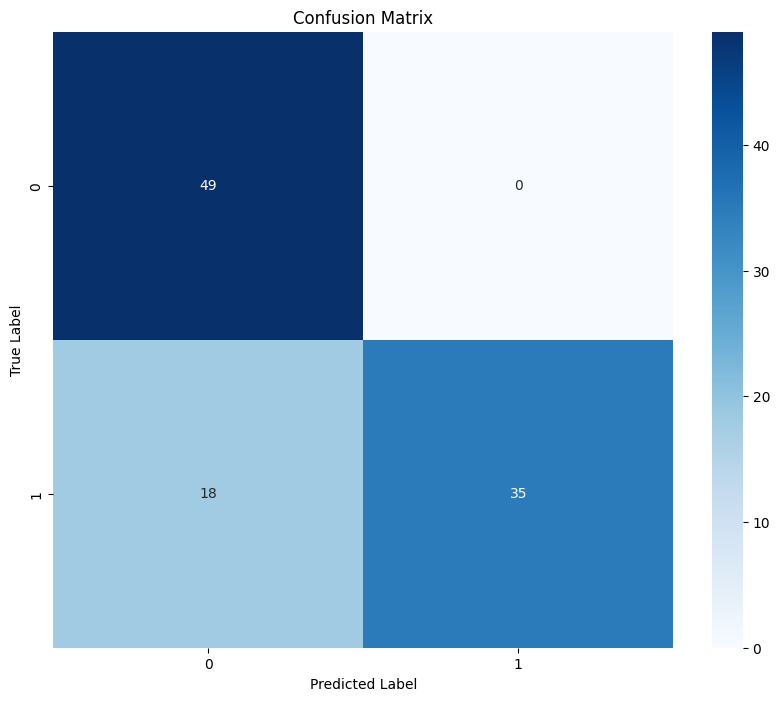

In [43]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


y_pred = model.predict(X_test)

cutoff =0.5

y_pred_classes = np.zeros_like(y_pred)    
y_pred_classes[y_pred > cutoff] = 1 

cm = confusion_matrix(y_test,y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')  
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [44]:
import os
import librosa
from pydub import AudioSegment
from pydub.playback import play
import numpy as np


def pitch_shift(audio, semitones):
    return audio._spawn(audio.raw_data, overrides={
        "frame_rate": int(audio.frame_rate * (2 ** (semitones / 12.0)))
    })

def time_stretch(audio, rate):
    return audio.speedup(playback_speed=rate)


input_folder = 'word_background'
output_folder = 'new'

os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    if filename.endswith('.wav'):  
        file_path = os.path.join(input_folder, filename)
        audio = AudioSegment.from_wav(file_path)
        
        original_output_path = os.path.join(output_folder, f'original_{filename}')
        audio.export(original_output_path, format='wav')
        
        
        augmented1 = pitch_shift(audio, 3) 
        augmented2 = time_stretch(audio, 1.5)  
        
        augmented1_output_path = os.path.join(output_folder, f'augmented1_{filename}')
        augmented2_output_path = os.path.join(output_folder, f'augmented2_{filename}')
        
        augmented1.export(augmented1_output_path, format='wav')
        augmented2.export(augmented2_output_path, format='wav')


In [45]:
import os
import librosa
from pydub import AudioSegment
from pydub.playback import play
import numpy as np


def pitch_shift(audio, semitones):
    return audio._spawn(audio.raw_data, overrides={
        "frame_rate": int(audio.frame_rate * (2 ** (semitones / 12.0)))
    })

def time_stretch(audio, rate):
    return audio.speedup(playback_speed=rate)


input_folder = 'jarvis_words'
output_folder = 'jarvis_augmented'

os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    if filename.endswith('.wav'):  
        file_path = os.path.join(input_folder, filename)
        audio = AudioSegment.from_wav(file_path)
        

        original_output_path = os.path.join(output_folder, f'original_{filename}')
        audio.export(original_output_path, format='wav')
        
       
        augmented1 = pitch_shift(audio, 3)  
        augmented2 = time_stretch(audio, 1.5)  
        
        augmented1_output_path = os.path.join(output_folder, f'augmented1_{filename}')
        augmented2_output_path = os.path.join(output_folder, f'augmented2_{filename}')
        
        augmented1.export(augmented1_output_path, format='wav')
        augmented2.export(augmented2_output_path, format='wav')
